In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv("csv/82000278_Toamnei_CO2_2021_7_SHORT.csv")
dataframe.head()

,time,latitude,longitude,altitude,co2
0,1625086823,45.651464,25.615426,100,553
1,1625086883,45.651464,25.615426,100,551
2,1625086943,45.651464,25.615426,100,551
3,1625087003,45.651464,25.615426,100,558
4,1625087063,45.651464,25.615426,100,559


In [3]:
dataframe_size = len(dataframe.index)
dataframe_size

10499

In [4]:
train = dataframe[dataframe.index < dataframe_size*(3/4)]
test = dataframe[dataframe.index >= dataframe_size*(3/4)]

In [5]:
X_train = train[["time"]].values
Y_train = train[["co2"]].values
X_test = test[["time"]].values
Y_test = test[["co2"]].values

In [6]:
i_train=0
x_train=[]
y_train=[]
for el in X_train:
    x_train.append(i_train)
    y_train.append(Y_train[i_train][0])
    i_train=i_train+1

i_test=0
x_test=[]
y_test=[]
for el in X_test:
    x_test.append(i_test)
    y_test.append(Y_test[i_test][0])
    i_test=i_test+1

In [9]:
# 'bootstrap': True, 'max_depth': 55, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 600
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(bootstrap=True, max_depth=55, max_features='sqrt', min_samples_leaf=5, min_samples_split=6, n_estimators=600).fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([453.8489588, 453.8489588, 453.8489588, ..., 453.8489588,
       453.8489588, 453.8489588])

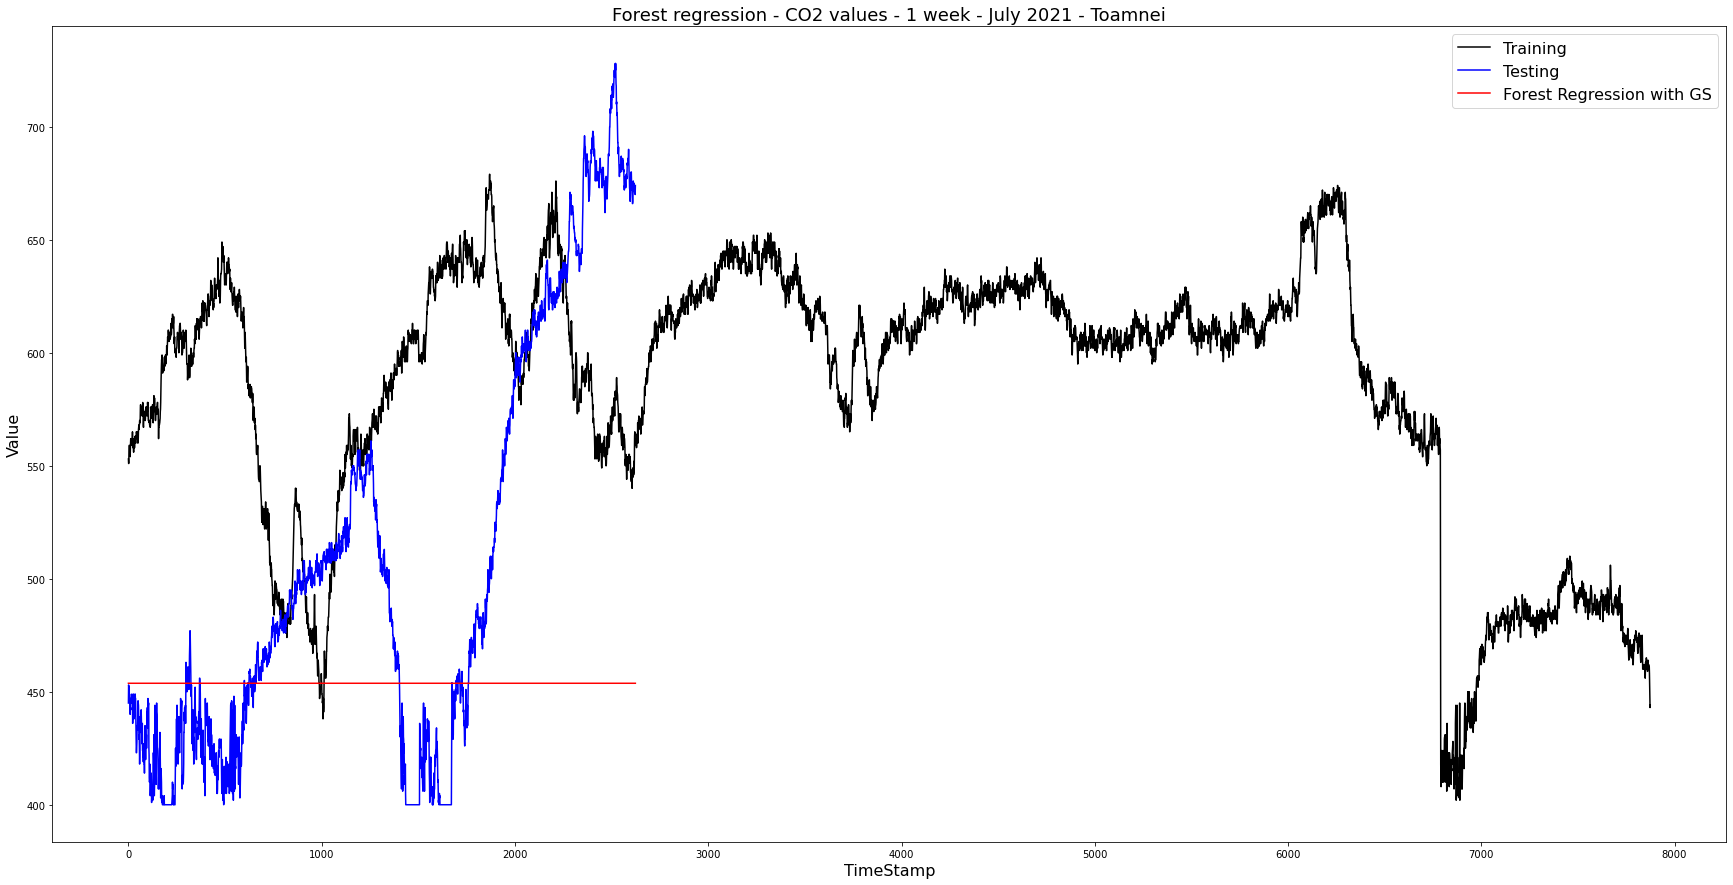

In [8]:
plt.figure(figsize=(30,15))
plt.plot(x_train, y_train, color = 'black', label= 'Training')
plt.plot(x_test, y_test, color = 'blue', label = 'Testing')
plt.plot(x_test, y_pred, color = 'red', label = 'Forest Regression with GS')
# plt.scatter(X, y, color = "green")
# plt.scatter(X, y_pred, color = "black")
plt.title('Forest regression - CO2 values - 1 week - July 2021 - Toamnei', fontsize=18)
plt.xlabel('TimeStamp', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
# plt.savefig('plots_from_csv/PM10_Toamnei_2021-12_ARD.jpg', bbox_inches = 'tight')
plt.show()